In [2]:
import pandas as pd
from fact.io import read_h5py

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
df_gamma_diff = pd.read_hdf('data/dl1_gamma-diffuse_south_pointing_20201017_v0.6.3_prod3_local_DL1_training.h5', key='dl1/event/telescope/parameters/LST_LSTCam')
df_gamma = pd.read_hdf('data/dl1_gamma_south_pointing_20201017_v0.6.3_prod3_local_DL1_training.h5', key='dl1/event/telescope/parameters/LST_LSTCam')
df_proton = pd.read_hdf('data/dl1_proton_south_pointing_20201017_v0.6.3_prod3_local_DL1_training.h5', key='dl1/event/telescope/parameters/LST_LSTCam')


In [4]:
max_intensity = 1500
df_gamma_diff_selected = df_gamma_diff.query(f'intensity < {max_intensity}')
df_gamma_selected = df_gamma.query(f'intensity < {max_intensity}')
df_proton_selected = df_proton.query(f'intensity < {max_intensity}')

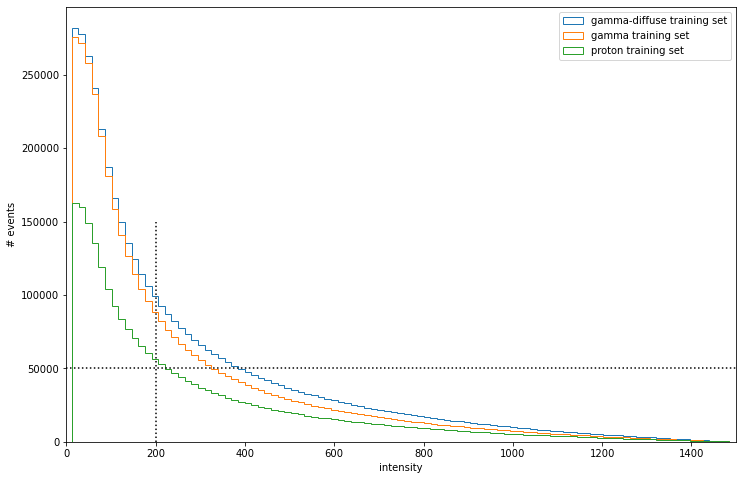

In [6]:
plt.hist(df_gamma_diff_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma-diffuse training set')
plt.hist(df_gamma_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma training set')
plt.hist(df_proton_selected.intensity, bins=100, histtype='step', cumulative=-1, label='proton training set')

plt.hlines(50000, 0, 1500, ls=':')
plt.vlines(200, 0, 150000, ls=':')

plt.xlabel('intensity')
plt.ylabel('# events')
plt.xlim(0, max_intensity)
plt.legend()
plt.show()